亚马逊雨林区是世界最大的雨林区，它可以消耗大量二氧化碳，阻止气候变暖；林区还藏有丰富的动植物资源，种类高达300万种，里面还有100万原住民。不幸的是，雨林生态系统不断面临着众多的威胁，越来越多的森林砍伐导致雨林面积逐年缩小。同时，全球变暖也增加了发生野火的可能性和频率。本案例对20年(1999-2019)的的亚马逊雨林火灾数据进行探索分析与可视化。

![png](http://cookdata.cn/media/note_images/start2_1578303970712_5d14.jpg)

# 目录
1. [火灾分析](#1.火灾分析)<br> 
&emsp;&emsp;1.1 [数据说明](#1.1)<br>
&emsp;&emsp;1.2 [导入所需的库并读取数据](#1.2)<br> 
&emsp;&emsp;1.3 [火灾发生时间的可视化分析](#1.3)<br> 
&emsp;&emsp;1.4 [火灾发生地点的可视化分析](#1.4)<br> 
&emsp;&emsp;1.5 [时间地点的组合分析](#1.5)<br> 
2. [森林退化与火灾分析](#2.森林退化与火灾分析)<br> 
&emsp;&emsp;2.1 [数据说明](#2.1)<br>
&emsp;&emsp;2.2 [读取数据](#2.2)<br> 
&emsp;&emsp;2.3 [森林退化面积随时间的变化](#2.3)<br> 
&emsp;&emsp;2.4 [森林退化地点的分析](#2.4)<br> 
&emsp;&emsp;2.5 [时间地点的组合分析](#2.5)<br>
&emsp;&emsp;2.6 [火灾与森林退化的分析](#2.6)<br>
3. [气候现象与火灾分析](#3.气候现象与火灾分析)<br> 
&emsp;&emsp;3.1 [数据说明](#3.1)<br>
&emsp;&emsp;3.2 [数据读取](#3.2)<br> 
&emsp;&emsp;3.3 [火灾与气候现象的分析](#3.3)<br> 
&emsp;&emsp;3.4 [森林退化与气候现象的分析](#3.4)<br> 
4. [总结](#4.总结)


# 1 火灾分析

### <a id=1.1></a> 1.1 数据说明

本案例基于巴西国家太空研究所(INPE)公开的卫星图像检测数据，该数据记录了亚马逊地区火灾的情况。

`amazon_fires.csv`：按州、月份和年份统计在从1999年到2019年巴西亚马逊地区发生的火灾次数。

数据共计2104条，各数据字段含义如下表所示：

|字段|含义
|:-|:-
|year |发生年份
|month |发生月份
|state|发生地点(州名)
|latitude |平均纬度
|longitude |平均经度
|firespots |火灾发生次数

### <a id=1.2></a> 1.2 导入所需的库并读取数据

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties
font = FontProperties(fname = "./input/SimHei.ttf", size=14)
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
amazon_fires = pd.read_csv("./input/amazon_fires.csv")
print(amazon_fires.info())
print(amazon_fires.describe())
amazon_fires.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 6 columns):
year         2104 non-null int64
month        2104 non-null int64
state        2104 non-null object
latitude     2104 non-null float64
longitude    2104 non-null float64
firespots    2104 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 98.7+ KB
None
              year        month     latitude    longitude     firespots
count  2104.000000  2104.000000  2104.000000  2104.000000   2104.000000
mean   2009.267110     6.704848    -5.439282   -56.510314   1167.417776
std       5.963029     3.431949     4.852439     7.382619   2959.558714
min    1999.000000     1.000000   -14.431908   -73.085000      1.000000
25%    2004.000000     4.000000    -9.946974   -62.376004     16.000000
50%    2009.000000     7.000000    -5.808292   -55.876480    121.000000
75%    2014.000000    10.000000    -2.595169   -50.396154    755.000000
max    2019.000000    12.000000     4.151000   

year  month        state   latitude  longitude  firespots
0  1999      1     AMAZONAS  -2.371113 -59.899933          3
1  1999      1     MARANHAO  -2.257395 -45.487831         36
2  1999      1  MATO GROSSO -12.660633 -55.057989         18
3  1999      1         PARA  -2.474820 -48.546967         87
4  1999      1     RONDONIA -12.861700 -60.513100          1

可以看到:
+ 所有字段均为数字型，且不存在缺失值。接下来我们通过描述性统计函数`describe()`检查数据中有无明显异常值。
+ 年份、月份的最小最大值分别为`(1999,2019)`,`(1,12)`，且经纬度数据、火灾发生次数均不存在明显异常，说明原始数据较为"干净"。

### <a id=1.3></a> 1.3 火灾发生时间的可视化分析

首先按照年份分组，计算1999-2019年每年火灾的火灾发生总数，并通过折线图的方法进行可视化。

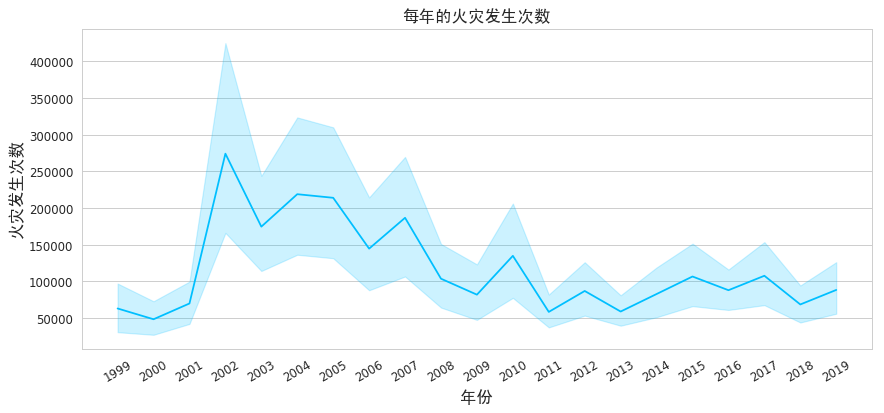

In [84]:
int_year = list(range(1999, 2020))

plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

sns.lineplot(data=amazon_fires, x='year', y='firespots', estimator='sum', color="deepskyblue")

plt.ylabel("火灾发生次数", size="large",fontproperties = font)
plt.xlabel("年份", size="large",fontproperties = font)
plt.xticks(int_year, rotation=30)
plt.title("每年的火灾发生次数", size="x-large",fontproperties = font)
plt.grid(axis='x')

plt.show()

可以看到，亚马逊地区的火灾爆发在2002年达到了一个高峰，从2002年以来，火灾情况呈逐渐减少的趋势。从2010到2019年，每年的火灾爆发情况呈现小范围波动。接下来我们按月统计火灾爆发的情况，通过统计12月中每月的平均火灾数进行观察。

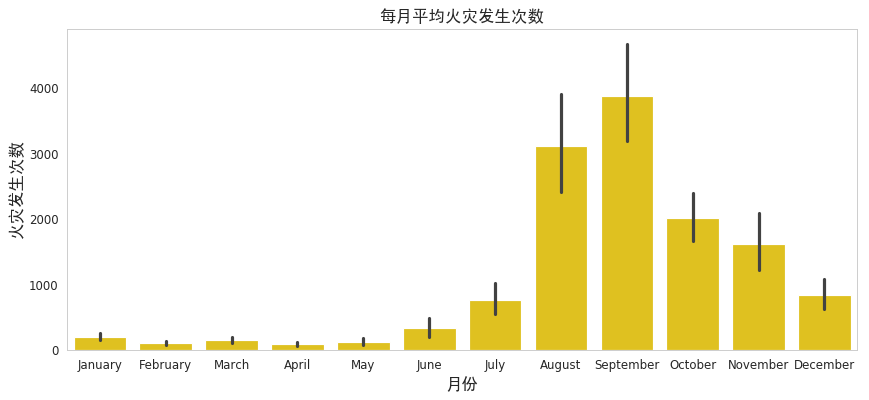

In [81]:
fullmonth = ['January', 'February', 'March', 'April', 'May', 'June',
             'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

sns.barplot(data=amazon_fires, x='month', y='firespots', color="gold")

plt.grid(False)
plt.ylabel("火灾发生次数", size="large",fontproperties = font)
plt.title("每月平均火灾发生次数", size="x-large",fontproperties = font)
plt.xlabel("月份", size="large",fontproperties = font)
plt.xticks(ticks=amazon_fires['month'].unique()-1, labels=fullmonth)
plt.show()

从上图中可以明显看出：下半年平均受火灾的影响比上半年高很多，平均着火点数目前三的月份分别是9月，8月和10月。

一般情况下，亚马逊的旱季从7月持续到10月，在9月底达到顶峰。在一年的其他时间里，潮湿的天气会将火灾的风险降到最低。但在旱季，降雨量的减少可能对火灾情况有较大影响。

### <a id=1.4></a> 1.4 火灾发生地点的可视化分析

巴西一级行政区划包括26个州和1个联邦区，亚马逊雨林分布在其中的9个州，接下来我们通过计算每个州的火灾发生总数来分析一下哪个州受雨林火灾影响最大。

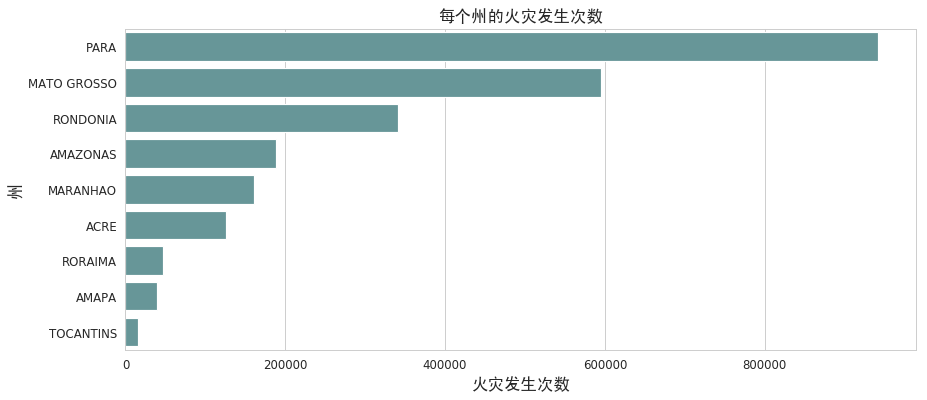

In [80]:
state_name = (amazon_fires[['state','firespots']].groupby('state',as_index=False)
              .sum().sort_values('firespots',ascending=False)['state'].values)

plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

sns.barplot(data=amazon_fires, x='firespots', y='state', estimator=sum, color='cadetblue', order=state_name, ci=None)    

plt.ylabel("州", size="large",fontproperties = font)
plt.title("每个州的火灾发生次数", size="x-large",fontproperties = font)
plt.xlabel("火灾发生次数", size="large",fontproperties = font)
plt.show()

从上图中可以看到，帕拉州(PARA)和马托格罗索州(MATO GROSSO)是受亚马逊河大火影响最大的巴西州，其火灾着火点总数是其他州加起来的至少两倍。接下来我们通过经纬度数据进行地理绘图，将火灾发生地点进行标记。

In [6]:
import folium

fires = folium.map.FeatureGroup()

for lat, lng, in zip(amazon_fires['latitude'], amazon_fires['longitude']):
    fires.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=4, 
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )

    
latitude = -5
longitude = -56

san_map = folium.Map(location=[latitude, longitude], zoom_start=5)
san_map.add_child(fires)

通过观察上图，帕拉州(PARA)、亚马孙州(AMAZONAS)马托格罗索州(MATO GROSSO)的标记点最多，接下来我们通过热力图的方式再进行一些展示。

In [7]:
from folium.plugins import HeatMap

san_map = folium.Map(location = [latitude, longitude], zoom_start = 5)

heatdata = amazon_fires[['latitude','longitude']].values.tolist()

HeatMap(heatdata).add_to(san_map)

san_map

热力图通过红、黄、绿进行颜色过渡，颜色越红的地方代表火灾次数越多。由上图可看出帕拉州(PARA)和亚马孙州(AMAZONAS)红色区域覆盖范围最多，颜色也相应较深，说明这片区域内容易着火。

### <a id=1.5></a> 1.5 时间地点的组合分析

为了更好地了解问题和当前状况，现在我们将特征进行组合，更加深入的研究数据。

我们根据州和年份进行组合，分析多年来每个州的火灾情况。

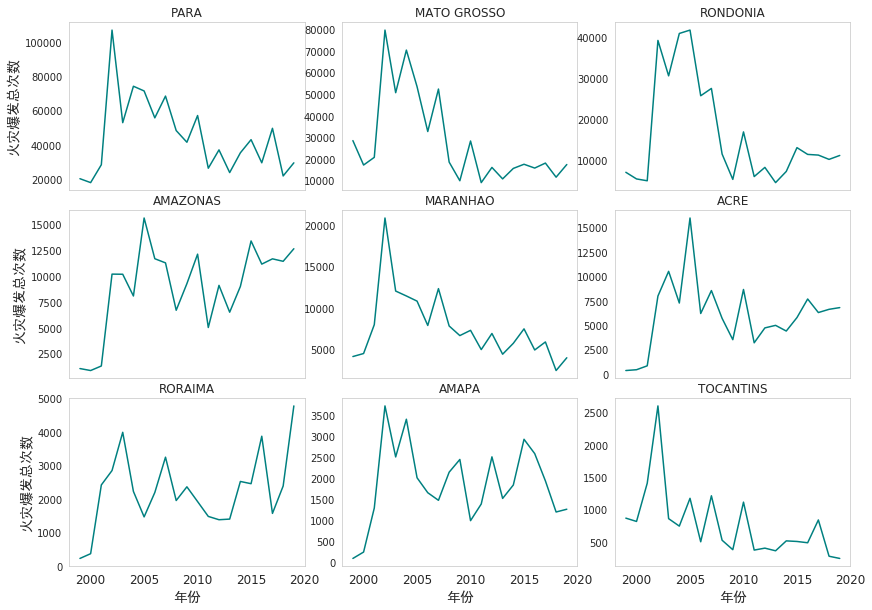

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(14, 10), sharex=True)
sns.set_style("whitegrid")
ax = ax.flat

i=0
for x in state_name:
    sns.lineplot(data=amazon_fires[amazon_fires['state'] == x], x='year',
                 y='firespots', estimator='sum', ax=ax[i], color='teal', ci=None)
    ax[i].set_title(x, size='large')
    ax[i].set_xlabel("年份", size='large',fontproperties = font)
    ax[i].set_xticks([2000, 2005, 2010, 2015, 2020])
    ax[i].grid(False)
    ax[i].set_xticklabels([2000, 2005, 2010, 2015, 2020], fontsize='large')
    
    if i==0 or i==3 or i==6:
        ax[i].set_ylabel("火灾爆发总次数", size='large',fontproperties = font)
    else:
        ax[i].set_ylabel("")
    
    i += 1

plt.subplots_adjust(wspace=0.16, hspace=0.12)
plt.show()

从上图可以看出每个州在02年左右都出现了火灾高峰，因此导致整体上02年火灾数目非常高，02年之后大部分州的火灾数目都逐渐减少。但是其他州也有例外，例如AMAZONAS州和RORAIMA州在02年减少之后又逐年增加，并且RORAIMA州在2019年达到了顶峰。

接下来我们再根据州和月份进行组合，分析不同月份下每个州的火灾情况，下图显示了每个州每月爆发火灾次数的平均值。

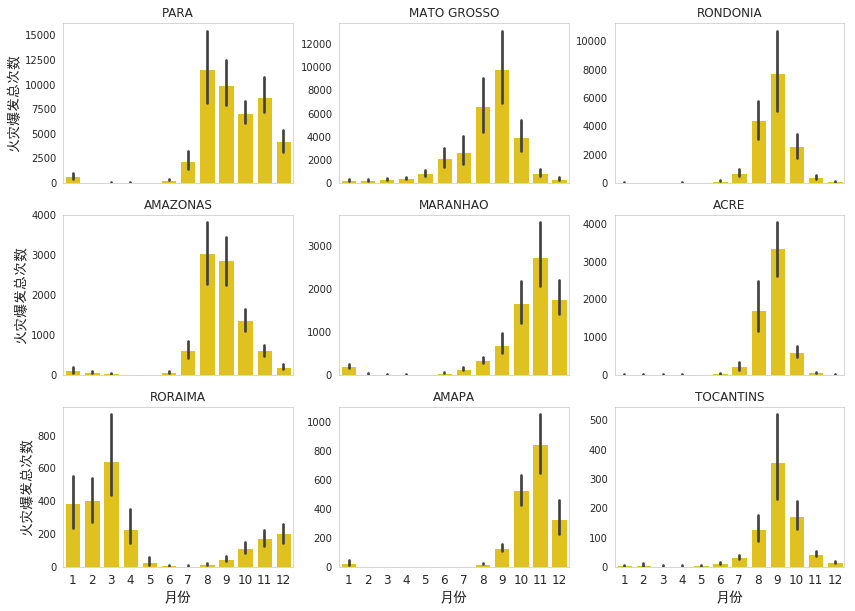

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(14, 10), sharex=True)
sns.set_style("whitegrid")
ax = ax.flat

i=0
for x in state_name:
    sns.barplot(data=amazon_fires[amazon_fires['state'] == x], x='month',
                y='firespots', ax=ax[i], color='gold')
    ax[i].set_title(x, size='large')
    ax[i].grid(False)
    ax[i].set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12], fontsize='large')
    
    if x in ['PARA', 'AMAZONAS', 'RORAIMA']:
        ax[i].set_ylabel("火灾爆发总次数", size='large',fontproperties = font)
    else:
        ax[i].set_ylabel("")
    
    if x in ['RORAIMA', 'AMAPA', 'TOCANTINS']:
        ax[i].set_xlabel("月份", size='large',fontproperties = font)
    else:
        ax[i].set_xlabel("")
    
    i += 1
    
plt.show()

除罗赖马州(RORAIMA)之外，所有州的火灾都集中在下半年(7-10月)，即亚马逊雨林的旱季。接下来我们结合年份、月份和州三个属性进行可视化，分析火灾爆发的次数，下方热力图显示了每年各州每月份的火灾爆发量，颜色越深代表火灾爆发次数越多。

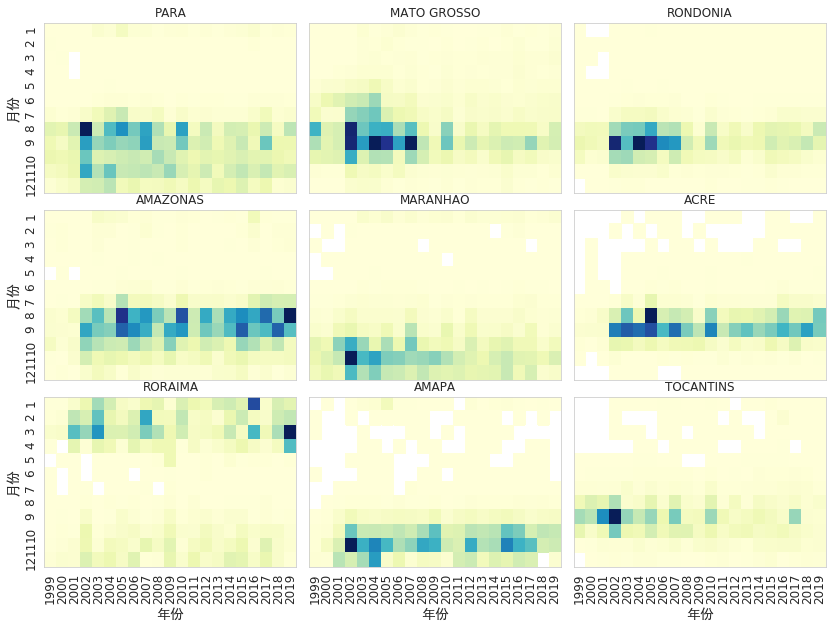

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(14, 10), sharex=True, sharey=True)
ax = ax.flat

i=0
for x in state_name:
    st_month_year_pivot = amazon_fires[amazon_fires['state'] == x].pivot_table(values='firespots', index='month', columns='year', aggfunc='sum')
    
    sns.heatmap(data=st_month_year_pivot, xticklabels=int_year, ax=ax[i], cmap='YlGnBu', cbar=False)
    
    ax[i].set_ylabel("月份", size='large',fontproperties = font)
    ax[i].set_xlabel("年份", size='large',fontproperties = font)
    ax[i].set_title(x, size='large')
    ax[i].set_xticklabels(int_year, fontsize='large')
    ax[i].set_yticklabels([1,2,3,4,5,6,7,8,9,10,11,12], fontsize='large')
    
    for _, spine in ax[i].spines.items():
        spine.set_visible(True)
        
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)
    
    i += 1
    

for a in [ax[0], ax[3], ax[6]]:
    a.yaxis.set_visible(True)
    
for a in [ax[6], ax[7], ax[8]]:
    a.xaxis.set_visible(True)
    
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.show()

从上方热力图可以看出：几乎每个州在所有年份的火灾高峰期都在7月到10月，这印证了之前的结论。并且在理火灾方面需要对RORAIMA州在1至4月份格外注意，因为只有RORAIMA州的火灾高峰期不在7月到10月。 从PARA、MATO GROSSO、RONDONIA、MARANHAO和TOCANTINS五个州的数据来观察，随着年份的推移，火灾爆发的次数大大减少了。

# 2.森林退化与火灾分析

### <a id=2.1></a> 2.1 数据说明
`deforested.csv`：2004年至2019年按州和州划分的森林退化面积(km²)。数据为公开数据，2019年12月16日从INPE网站提取。

|字段|含义
|:-|:-
|Ano/Estados | 年份
|AC|英亩州的森林退化面积（km²）
|AM|亚马孙州的森林退化面积（km²）
|AP|阿马帕州州的森林退化面积（km²）
|MA|马拉尼昂州的森林退化面积（km²）
|MT|马托格罗索州的森林退化面积（km²）
|PA|帕拉州的森林退化面积（km²）
|RO|朗多尼亚州的森林退化面积（km²）
|RR|罗赖马州的森林退化面积（km²）
|TO |托坎廷斯州的森林退化面积（km²）
|AMZ LEGAL|该年巴西森林退化面积总和（km²）

### <a id=2.2></a> 2.2 读取数据

In [11]:
deforested_area = pd.read_csv("./input/deforested.csv")
deforested_area.head()

Ano/Estados   AC    AM   AP    MA     MT    PA    RO   RR   TO  AMZ LEGAL
0         2004  728  1232   46   755  11814  8870  3858  311  158      27772
1         2005  592   775   33   922   7145  5899  3244  133  271      19014
2         2006  398   788   30   674   4333  5659  2049  231  124      14286
3         2007  184   610   39   631   2678  5526  1611  309   63      11651
4         2008  254   604  100  1271   3258  5607  1136  574  107      12911

为了更为方便了知道哪一列代表哪个州，我们将列进行重命名，同时我们新增一列`total_cummulative`，记录逐年森林退化的累加值。

In [12]:
column_names = ["year", "ACRE", "AMAZONAS", "AMAPA", "MARANHAO","MATO GROSSO", 
                "PARA", "RONDONIA", "RORAIMA", "TOCANTINS","sum_deforested_area"]
deforested_area.columns = column_names

deforested_area["total_cummulative"] = deforested_area.sum_deforested_area.cumsum()

deforested_area.head()

year  ACRE  AMAZONAS  AMAPA  MARANHAO  MATO GROSSO  PARA  RONDONIA  \
0  2004   728      1232     46       755        11814  8870      3858   
1  2005   592       775     33       922         7145  5899      3244   
2  2006   398       788     30       674         4333  5659      2049   
3  2007   184       610     39       631         2678  5526      1611   
4  2008   254       604    100      1271         3258  5607      1136   

   RORAIMA  TOCANTINS  sum_deforested_area  total_cummulative  
0      311        158                27772              27772  
1      133        271                19014              46786  
2      231        124                14286              61072  
3      309         63                11651              72723  
4      574        107                12911              85634

### <a id=2.3></a> 2.3 森林退化面积随时间的变化

下图显示了自2004年以来巴西亚马逊地区每年森林退化面积的总和(km²)，以及每年累积的森林退化面积。

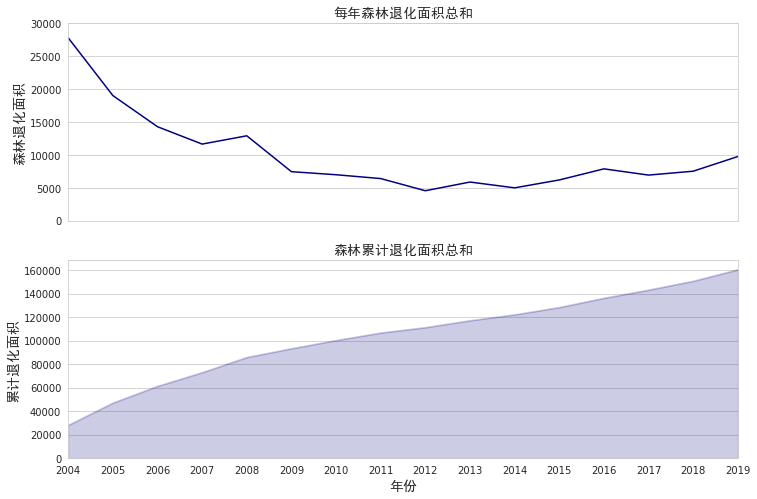

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12,8), sharex=True)
sns.set_style("whitegrid")

sns.lineplot(data = deforested_area, x = 'year', y = 'sum_deforested_area', color = 'navy', ax=ax1)
ax1.set_ylabel("森林退化面积", size="large",fontproperties = font)
ax1.set_xlabel("年份", size="large",fontproperties = font)
ax1.set_title("每年森林退化面积总和", size='large',fontproperties = font)
ax1.grid(axis='x')
ax1.set_xlim(2004,2019)
ax1.set_ylim(0,30000)

deforested_area.set_index("year")['total_cummulative'].plot.area(color='navy', alpha=0.2, ax=ax2)
ax2.set_ylabel("累计退化面积", size="large",fontproperties = font)
ax2.set_xlabel("年份", size="large",fontproperties = font)
ax2.set_title("森林累计退化面积总和", size='large',fontproperties = font)
ax2.grid(axis='x')
ax2.set_xticks(list(range(2004,2020)))
ax2.set_xticklabels(list(range(2004,2020)))

plt.show()

折线图显示了每年的森林退化面积，2004年是一个高峰，森林退化值超过3万平方公里。然后森林退化数量逐渐减少并似乎稳定，从2009年到2018年，森林退化保持在8000km²以下。然而在2019年该数字再次达到10000km²。累积图表显示，从2004年到今天，超过16万平方公里的亚马逊雨林退化，平均每天有接近30平方公里的雨林消失，平均一分钟一个足球场！

### <a id=2.4></a> 2.4 森林退化地点的分析



下面计算数据集中每个州所有年份的森林退化面积总和。

In [35]:
state = deforested_area.drop(['sum_deforested_area','total_cummulative'],axis=1).melt(id_vars=['year'], var_name='state', value_name='defarea')
state.head()

year state  defarea
0  2004  ACRE      728
1  2005  ACRE      592
2  2006  ACRE      398
3  2007  ACRE      184
4  2008  ACRE      254

我们按照火灾发生次数降序排列每个州的累计森林退化面积

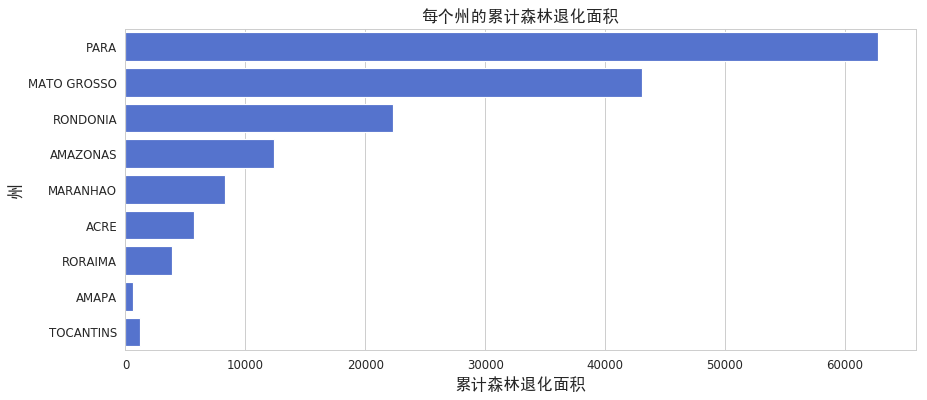

In [78]:
plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

sns.barplot(data = state, x='defarea', y='state', estimator=sum, color='royalblue',order=state_name, ci=None)    

plt.ylabel("州",fontproperties = font)
plt.title("每个州的累计森林退化面积",fontproperties = font)
plt.xlabel("累计森林退化面积",fontproperties = font)
plt.show()

从图结合各州火灾发生次数可以看出，火灾次数越高的州，其累计森林退化面积越大。帕拉州(PARA)和马托格罗索州(MATO GROSSO)是受亚马逊河森林退化影响最大的巴西州，其森林退化总面积至少是其他州的两倍。此外，尽管AMAPA的火灾爆发次数多于TOCANTINS，但在森林退化上TOCANTINS明显多于AMAPA，说明在TOCANTINS州出现了较多非火灾情况影响的森林退化。

### <a id=2.5></a> 2.5 时间地点的组合分析

我们每个州的森林退化进行单独分析，下图显示了每个州每年的的森林退化面积。

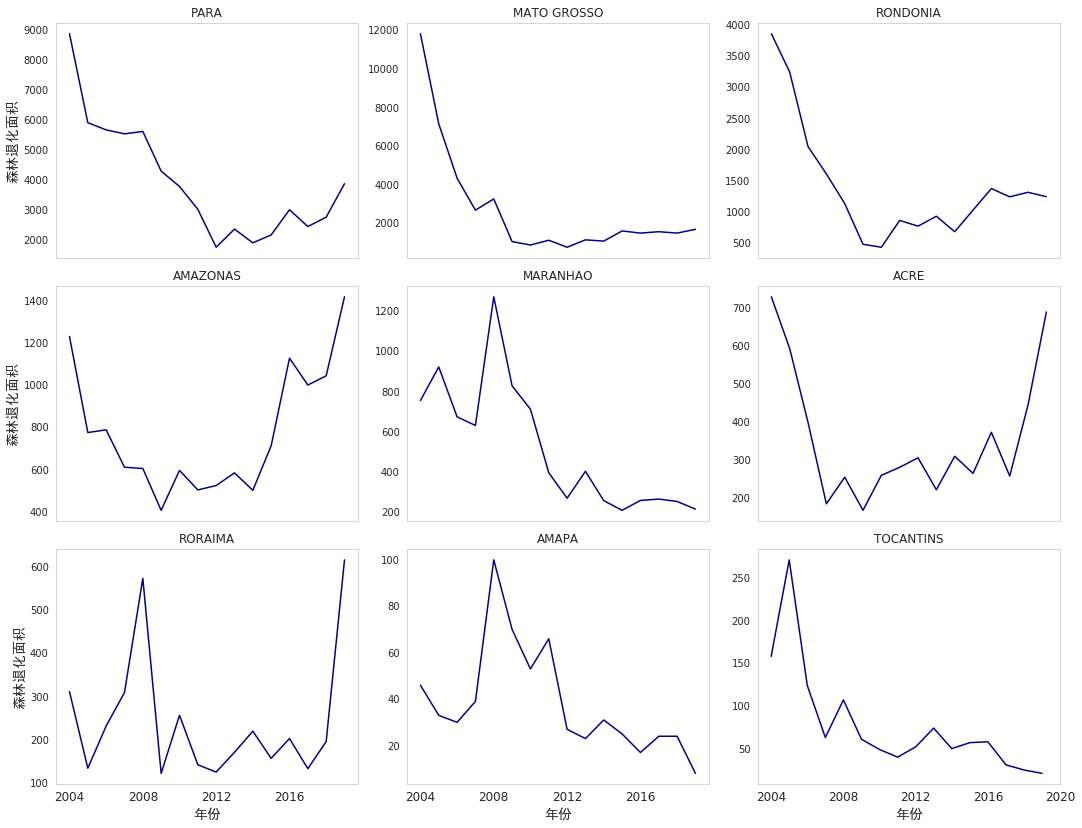

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(18, 14), sharex=True)
sns.set_style("whitegrid")
ax = ax.flat

i=0
for x in state_name:
    sns.lineplot(data=state[state['state'] == x], x='year',
                 y='defarea', estimator='sum', ax=ax[i], color='darkblue', ci=None)
    ax[i].set_title(x, size='large')
    ax[i].set_xlabel("年份", size='large',fontproperties = font)
    ax[i].set_xticks([2004, 2008, 2012, 2016, 2020])
    ax[i].set_xticklabels([2004, 2008, 2012, 2016, 2020], fontsize='large')
    ax[i].grid(False)
    
    if i==0 or i==3 or i==6:
        ax[i].set_ylabel("森林退化面积", size='large',fontproperties = font)
    else:
        ax[i].set_ylabel("")
    
    i += 1

plt.subplots_adjust(wspace=0.16, hspace=0.12)
plt.show()

+ 对于AMAZONAS，ACRE和RORAIMA三个州来说，森林退化下降之后又有明显的回升趋势，并且2019年森林退化面积突然增大。帕拉州在2019年也显示出森林退化面积的显着增加，但其2019年的数值并没有非常高。几年来，MATO GROSSO,MARANHAO，AMAPA和TOCANTINS的森林退化面积逐年减少。

### <a id=2.6></a> 2.6 火灾与森林退化的分析

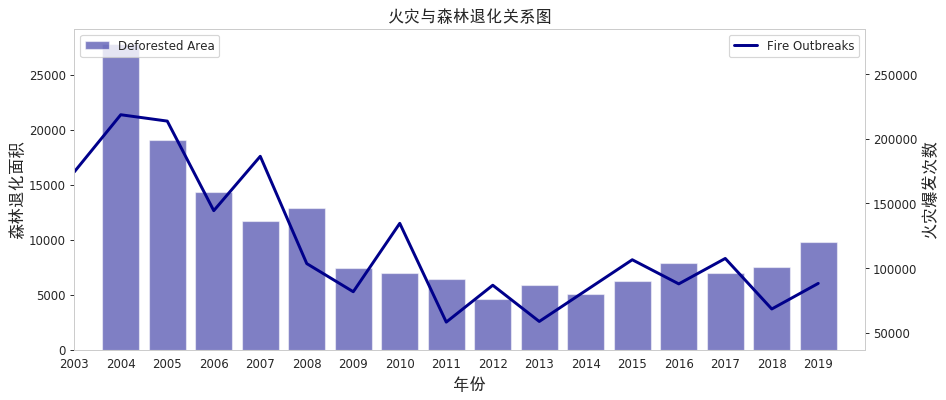

In [47]:
fig, ax = plt.subplots(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

ax.bar(deforested_area['year'], deforested_area['sum_deforested_area'], color='darkblue', alpha=0.5, label='Deforested Area')
plt.grid(False)
ax.legend(loc="upper left")
ax.set_ylabel("森林退化面积", size="large",fontproperties = font)
ax.set_xlabel("年份", size="large",fontproperties = font)
ax.set_title("火灾与森林退化关系图",fontproperties = font)

ax2 = ax.twinx()
sns.lineplot(x=amazon_fires['year'], y=amazon_fires['firespots'], estimator='sum', color="darkblue", ci=None, ax=ax2, label='Fire Outbreaks', lw=2.5)
ax2.set_xticks(ticks=list(range(2003, 2020)))
ax2.set_xlim(2003, 2020)
ax2.set_ylabel("火灾爆发次数", size="large",fontproperties = font)
plt.grid(False)
ax2.legend()

plt.show()

可以看出森林退化面积和火灾次数的涨幅趋势基本一致，接下来我们通过相关系数进行观察。

In [51]:
comb = amazon_fires[amazon_fires['year'] > 2003].groupby('year').sum()
comb['area'] = deforested_area['sum_deforested_area'].values
comb[["firespots", "area"]].corr()

firespots      area
firespots   1.000000  0.833778
area        0.833778  1.000000

可以看出火灾的爆发与森林退化面积有相当大的相关性，因此火灾爆发与森林退化有很大的关系。

# 3.气候现象与火灾分析

### <a id=3.1></a> 3.1 数据说明

`climate_event.csv`：收集了有关最重要的两种气候现象的开始年，结束年和严重性的数据。数据是2019年12月20日从金门气象服务中提取的。


|字段|含义
|:-|:-
|start year |气候现象开始年份
|end year |气候现象结束年份
|phenomenonEl|气候现象 (El Niño / La Niña)
|severity |严重程度 (Weak / Moderate / Strong / Very Strong)

厄尔尼诺（西班牙语：El Niño），又称圣婴现象，与另一现象南方涛动合称为ENSO。 是秘鲁、厄瓜多尔一带的渔民用以称呼一种异常气候现象的名词。 主要指太平洋东部和中部的热带海洋的海水温度异常地持续变暖，使整个世界气候模式发生变化，造成一些地区干旱而另一些地区又降雨量过多。

拉尼娜（西班牙语“La Niña”），是厄尔尼诺现象的反相，也称为“反厄尔尼诺”或“冷事件”，它是指赤道附近东太平洋水温反常下降的一种现象，表现为东太平洋明显变冷，同时也伴随着全球性气候混乱，总是出现在厄尔尼诺现象之后。


### <a id=3.2></a> 3.2 数据读取


In [ ]:
climatic_event

In [52]:
climatic_event = pd.read_csv("./input/climatic_event.csv")
climatic_event.head()

start year  end year phenomenon  severity
0        2004      2005    El Nino      Weak
1        2006      2007    El Nino      Weak
2        2014      2015    El Nino      Weak
3        2018      2019    El Nino      Weak
4        2002      2003    El Nino  Moderate

为了便于通过可视化的方法表示气候强度，我们将Weak、Moderate、Strong、Very Strong四种强度分别用数字进行映射，在下面的柱形图中用以表示透明度。

In [53]:
alpha_map = {
    "Weak":0.2,
    "Moderate": 0.3,
    "Strong": 0.4,
    "Very Strong":0.5
}

climatic_event['alpha'] = climatic_event["severity"].map(alpha_map)

In [54]:
# 对两种现象进行分离
el_nino_records = climatic_event[climatic_event['phenomenon'] == 'El Nino'].copy()
la_nina_records = climatic_event[climatic_event['phenomenon'] == 'La Nina'].copy()

### <a id=3.3></a> 3.3 火灾与气候现象的分析

现在，让我们分析火灾与这些气候现象的关系。通过柱形颜色来表示不同的气候现象，蓝色代表厄尔尼诺，黄色代表拉尼娜，颜色越浅(越透明)，那一年的气候现象就越弱；灰色折线代表不同年份的火灾爆发次数。

In [72]:
climatic_event

start year  end year phenomenon     severity  alpha
0         2004      2005    El Nino         Weak    0.2
1         2006      2007    El Nino         Weak    0.2
2         2014      2015    El Nino         Weak    0.2
3         2018      2019    El Nino         Weak    0.2
4         2002      2003    El Nino     Moderate    0.3
5         2009      2010    El Nino     Moderate    0.3
6         2015      2016    El Nino  Very Strong    0.5
7         2000      2001    La Nina         Weak    0.2
8         2005      2006    La Nina         Weak    0.2
9         2008      2009    La Nina         Weak    0.2
10        2016      2017    La Nina         Weak    0.2
11        2017      2018    La Nina         Weak    0.2
12        2011      2012    La Nina     Moderate    0.3
13        1999      2000    La Nina       Strong    0.4
14        2007      2008    La Nina       Strong    0.4
15        2010      2011    La Nina       Strong    0.4

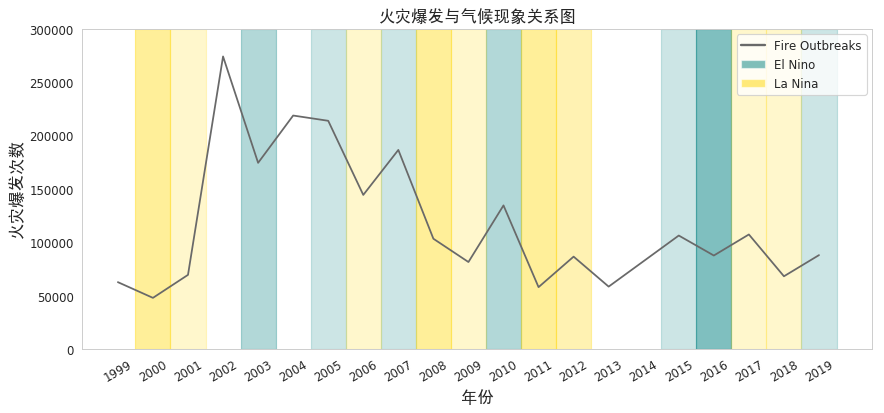

In [66]:
fig, ax = plt.subplots(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

# 绘制气候现象柱形图
for i, row in el_nino_records.iterrows(): 
    ax.axvspan(row["start year"]+0.5, row["end year"]+0.5, alpha=row["alpha"], color='teal', edgecolor=None, label='El Nino')

for i, row in la_nina_records.iterrows(): 
    ax.axvspan(row["start year"]+0.5, row["end year"]+0.5, alpha=row["alpha"], color='gold', edgecolor=None, label='La Nina')


    
# 绘制火灾爆发折线
sns.lineplot(x=amazon_fires['year'], y=amazon_fires['firespots'], estimator='sum', color="dimgrey", ci=None, ax=ax)
ax.grid(False)

plt.xticks(ticks=list(range(1999, 2020)), rotation=30)

plt.title("火灾爆发与气候现象关系图", size="x-large",fontproperties = font)
plt.xlabel('年份', size="large",fontproperties = font)
plt.ylabel('火灾爆发次数', size="large",fontproperties = font)

# 设置图例
legend_elements = [Line2D([0], [0], color='dimgrey', lw=2, label='Fire Outbreaks'),
                   Patch(facecolor='teal',label='El Nino', alpha=0.5),
                   Patch(facecolor='gold',label='La Nina', alpha=0.5)]

ax.legend(handles=legend_elements)
ax.set_ylim(0,300000)

plt.show()

众所周知，厄尔尼诺(El Nino)现象和拉尼娜(La Nina)现象是季节性的自然现象，是影响火灾的重要因素（例如在厄尔尼诺现象中，长期干旱和强风可以促进火势蔓延）。从上图可以看出，它们确实与火灾爆发次数相关。
+ 随着厄尔尼诺现象的发生（2005年，2007年，2010年，2015年，2019年），火灾爆发数量呈上升趋势。
+ 随着拉尼娜现象的发生，几年中火灾爆发数量呈下降趋势，例如2006、2008、2009、2011和2018年。

但其中也有个别例外，如在2016年出现了最强的厄尔尼诺现象，但火灾爆发次数却突然减少了；与2008年相比，2009年的拉尼娜现象减弱，但火灾爆发次数却有所减少，而2008年的火灾现象却更为明显。

这些矛盾表明，尽管这些现象似乎与火灾之间存在关联，但它可能不是因果关系，也不是最重要的因素。

### <a id=3.4></a> 3.4 森林退化与气候现象的分析

现在，让我们分析森林退化与这些气候现象的关系。 同样，通过柱形颜色来表示不同的气候现象，蓝色代表厄尔尼诺，黄色代表拉尼娜，颜色越浅(越透明)，那一年的气候现象就越弱；通过灰色折线代表不同年份的森林退化面积。

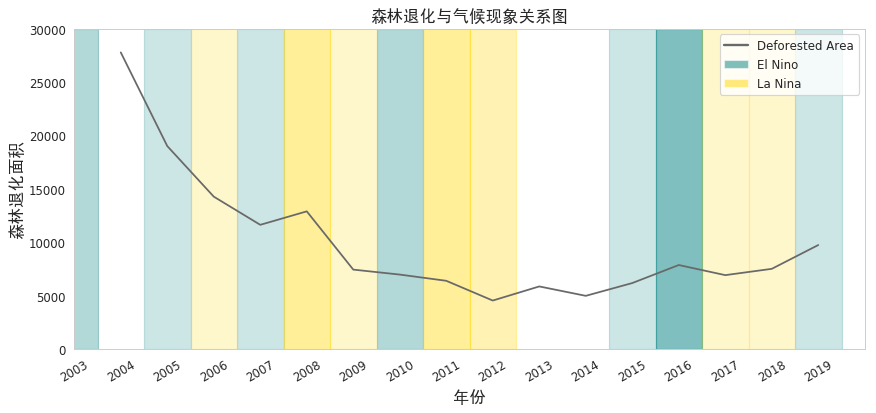

In [73]:
fig, ax = plt.subplots(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

for i, row in el_nino_records.iterrows(): 
    ax.axvspan(row["start year"]+0.5, row["end year"]+0.5, alpha=row["alpha"], color='teal', edgecolor=None, label='El Nino')

for i, row in la_nina_records.iterrows(): 
    ax.axvspan(row["start year"]+0.5, row["end year"]+0.5, alpha=row["alpha"], color='gold', edgecolor=None, label='La Nina')

sns.lineplot(x=deforested_area['year'], y=deforested_area['sum_deforested_area'],color="dimgrey", ci=None, ax=ax)
ax.grid(False)

plt.xticks(ticks=list(range(2003, 2020)), rotation=30)
ax.set_xlim(2003, 2020)

plt.title("森林退化与气候现象关系图", size="x-large",fontproperties = font)
plt.xlabel('年份', size="large",fontproperties = font)
plt.ylabel('森林退化面积', size="large",fontproperties = font)

legend_elements = [Line2D([0], [0], color='dimgrey', lw=2, label='Deforested Area'),
                   Patch(facecolor='teal',label='El Nino', alpha=0.5),
                   Patch(facecolor='gold',label='La Nina', alpha=0.5)]

ax.legend(handles=legend_elements)
ax.set_ylim(0,30000)

plt.show()

如果亚马逊地区的森林退化仅是自然原因造成的，那么图中能看到明显的变化关系，但是与火灾爆发不同，每年的总退化森林面积图与这些气候现象在图中没有呈现明确的关系。这表明退化的很大一部分可能是由于不自然的原因，可能包含一些人为原因例如人为的火灾或其他毁林方式。

# 4.总结

亚马逊雨林的面积约是印度的两倍，在调节全球气候和提供诸如水净化和二氧化碳吸收等其他服务方面发挥着至关重要的作用。在本案例中，我们首先从时间、空间的不同维度对亚马逊火灾的发生情况进行了可视化分析，发现7月至10月是火灾的高峰期；接着对森林退化数据进行了探索，分析森林退化与火灾发生的关系，随着火灾的减少森林退化的面积也在减少；最后结合气候现象对森林火灾和退化进行综合的分析，探索气候的影响。本案例绘制了丰富的可视化图形，对于数据的探索性分析可以提供参考。